# SUPERMARKET STORE BRANCHES SALES ANALYSIS

#### Supermarket-a large market selling a full range of food and beverages,
as well as household items(goods for children, soap,laundry detergents,dishwashing detergents,etc)

### TABLE OF CONTENTS

1.IMPORTING LIBRARIES AND LOADING DATA
2.DATA INFORMATION
3.EXPLORATORY DATA ANALYSIS
4.CLUSTER DATA ANALYSIS
5.DATA PREPROCESSING
6.RECOMENDATIONS

#### IMPORTING LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
data = pd.read_csv("Stores.csv")

#### DATA INFORMATION

In [34]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


#### The dataset is represented by five cases(columns) (one column is not informative) and 896 objects(rows).

In [35]:
#Removing store ID information.

In [36]:
data.drop(data.columns[0], axis =1, inplace=True)

 Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

DailyCustomerCount: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


### EXPLORATORY DATA ANALYSIS

 Lets look at the statistics of the dataset

In [38]:
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


Hypothesis: There are outliers in the form of very small and very large supermarkets. But are they outliers or are they separate groups of supermarkets?


 Let's check the data for the presence of categorical features.

In [42]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [44]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


In [46]:
data.Store_Sales.mean()*1.05

62318.87109375

 There are no categorical features. Let us analyze the distribution of features.

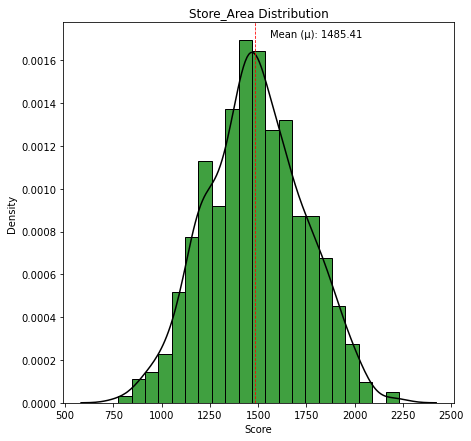

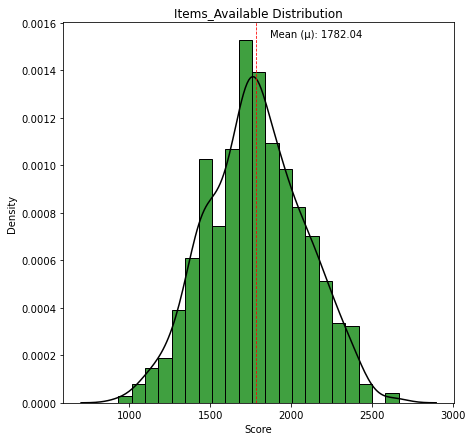

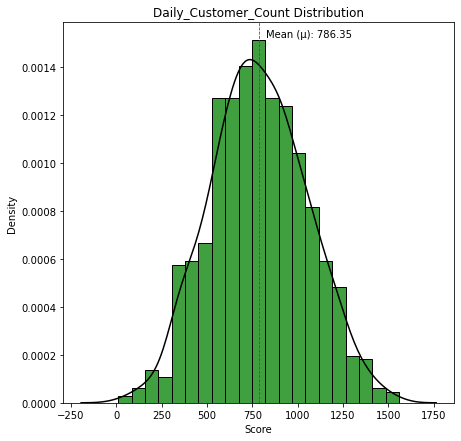

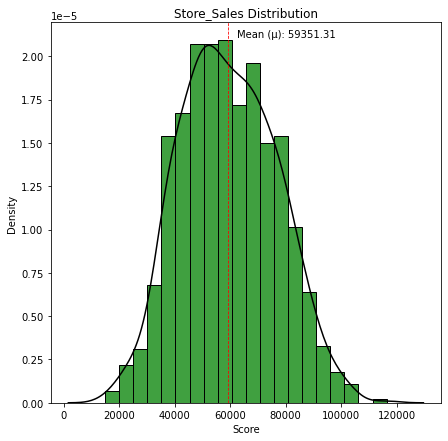

In [47]:
for column_name in data.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(data[column_name], stat='density',color='green')
  sns.kdeplot(data[column_name], color='black')
  plt.axvline(data[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(data[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

 Normal distribution, everyone who deals with statistics loves it :)


Let's look at the mutual relationship between features.

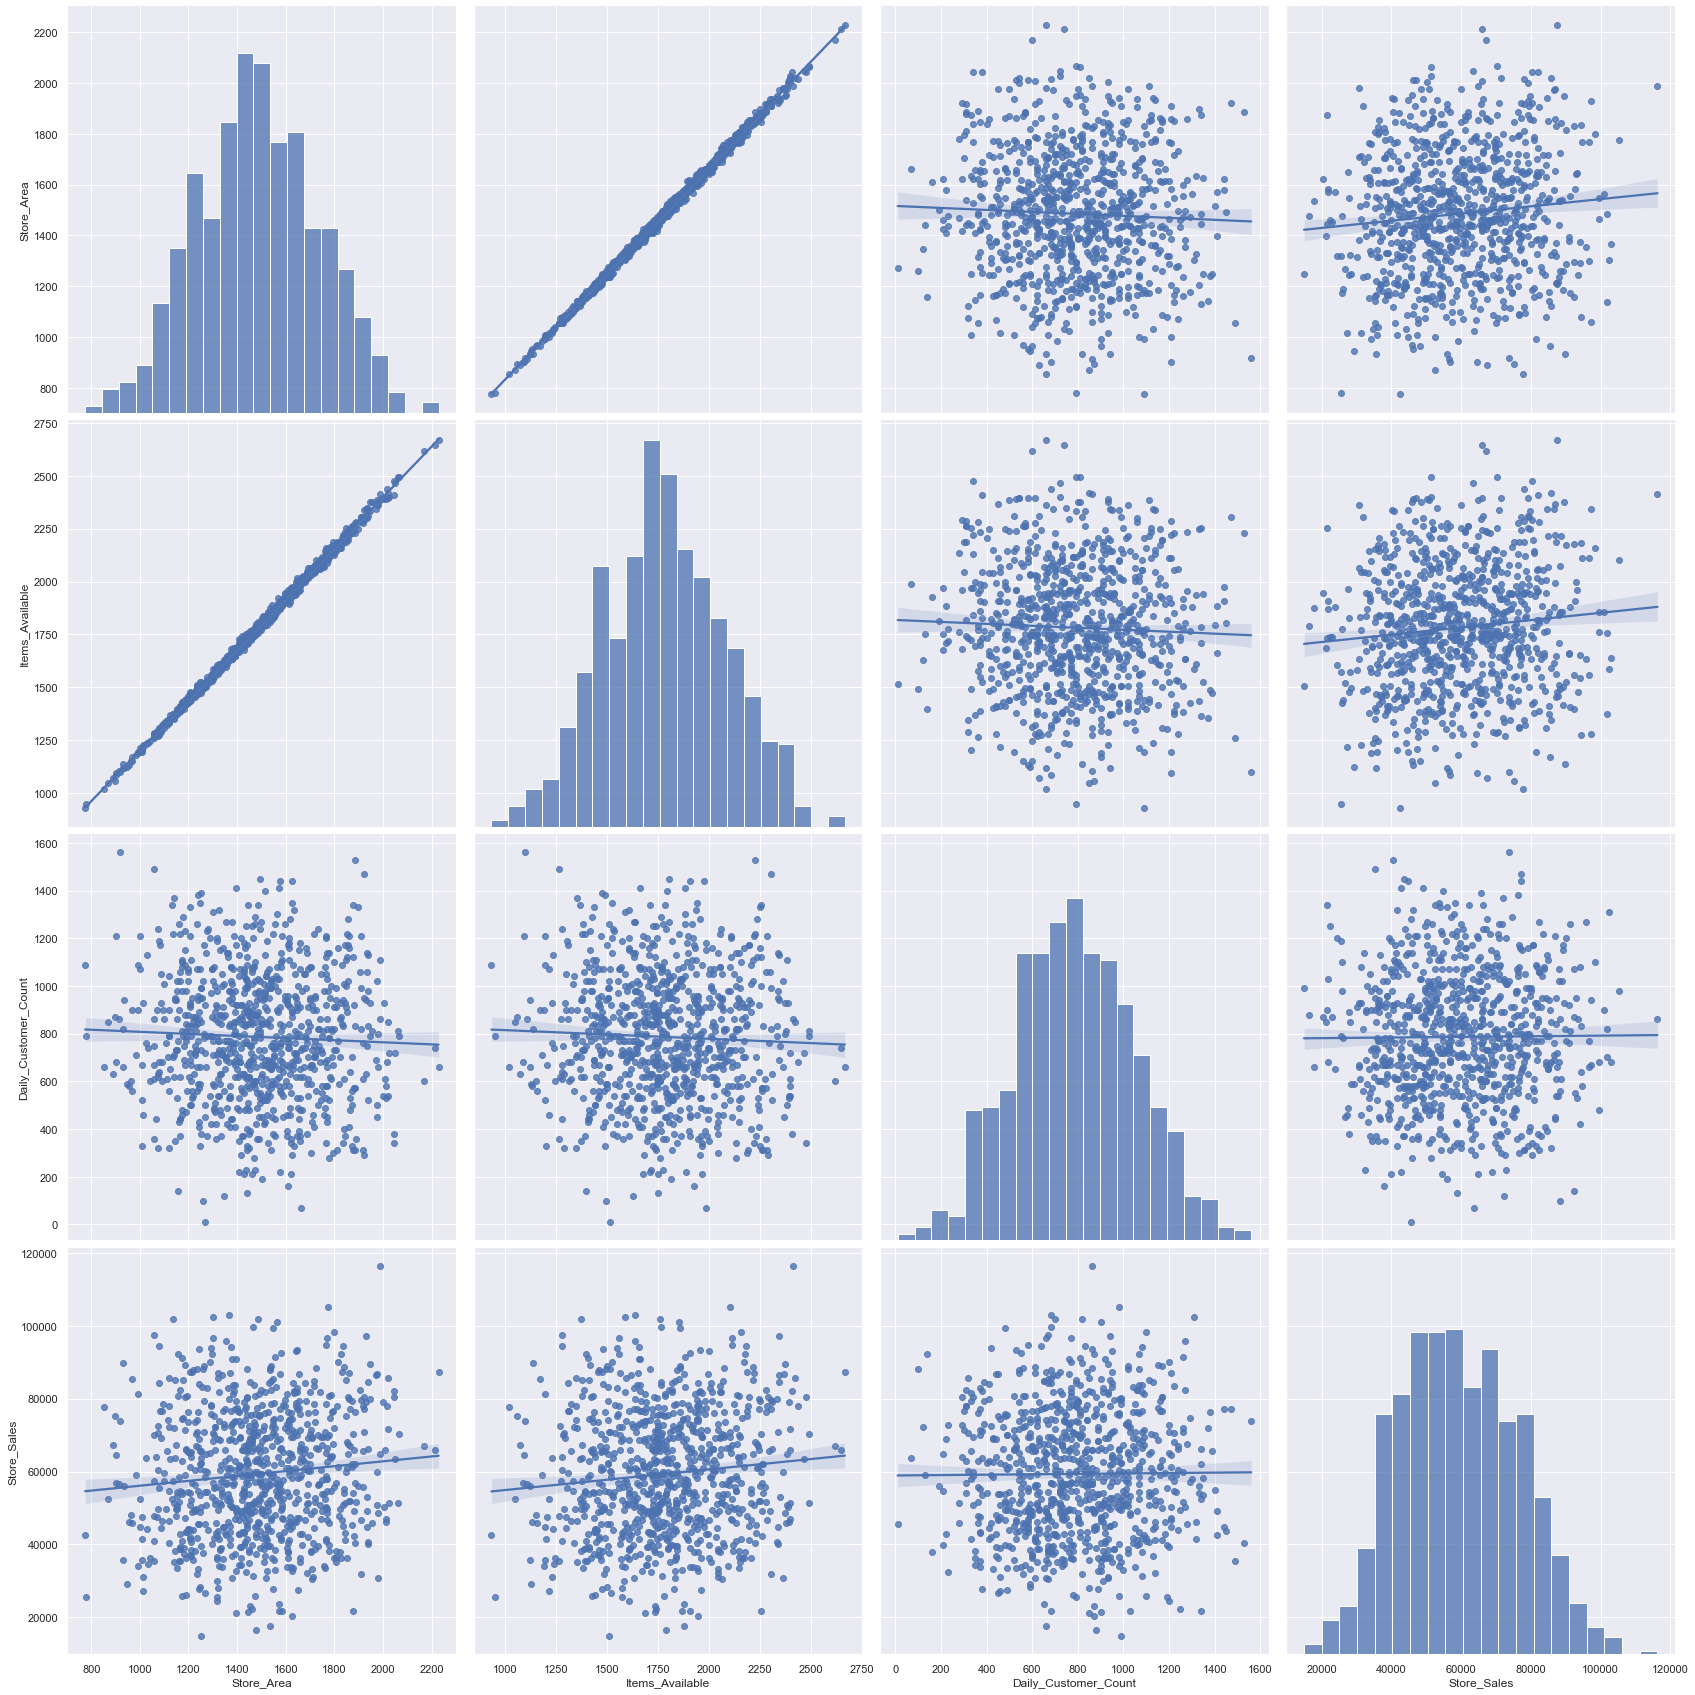

In [48]:
sns.set()
sns.pairplot(data,height = 6 ,kind ='reg',diag_kind='hist')
plt.show()

 Conclusions from the presented graphs: with the growth of the store area, the number of items sold increases. The obvious conclusion is that no one will use the area of ​​the store to accommodate fewer goods)


We are interested in the target indicator - the amount of money earned by the store. There is a slight correlation between store area (products sold) and the amount of money earned. The number of customers does not depend on revenue. For a more complete analysis of stores, there is not enough day of the week variable :)


Let's analyze the presence of outliers in the data. According to the unspoken rule, no more than 2% of the data should be deleted (no more than 20 lines of the dataset in this case).

In [49]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


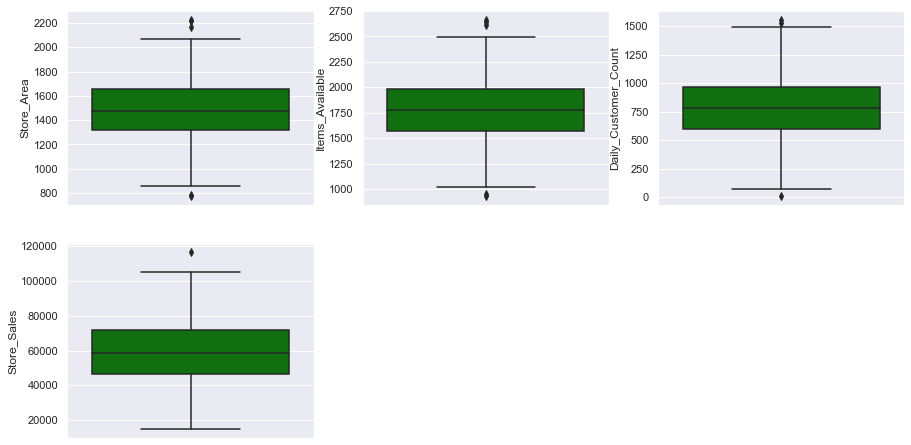

In [50]:
i=1
plt.figure(figsize=(15,25))
for feature in data.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=data[feature],color='green')
    i+=1

 There are minor outliers in the data. We'll remove them later.


Let's carry out a correlation analysis of these variables.

In [52]:
correlation = data.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



Index(['Store_Sales', 'Items_Available', 'Store_Area', 'Daily_Customer_Count'], dtype='object')


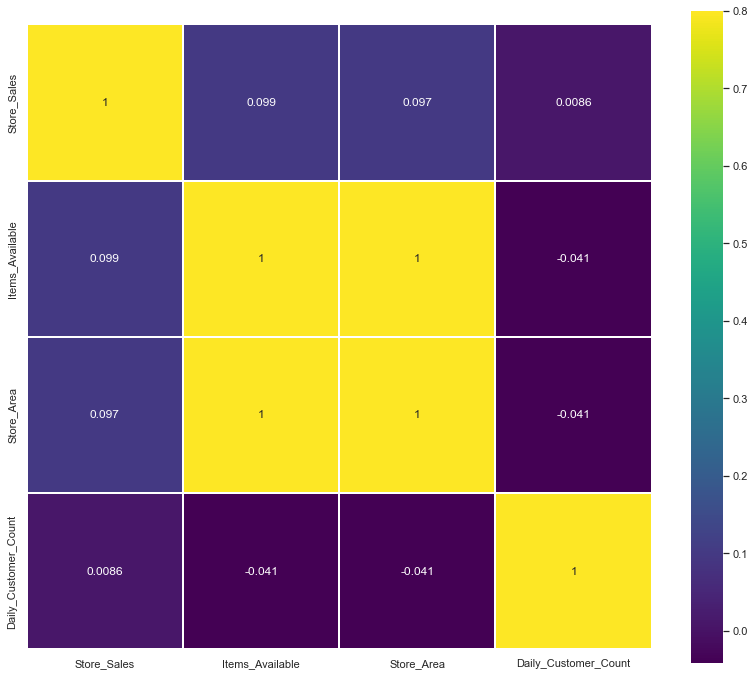

In [53]:
k= 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

 The signs of the area and the goods being sold are completely correlated, I propose to remove one of them.

In [54]:
data=data.drop('Store_Area',axis=1)

In [55]:
data

,Items_Available,Daily_Customer_Count,Store_Sales
0,1961,530,66490
1,1752,210,39820
2,1609,720,54010
3,1748,620,53730
4,2111,450,46620
...,...,...,...
891,1910,1080,66390
892,1663,850,82080
893,1436,1060,76440
894,1560,770,96610


### CLUSTER ANALYSIS

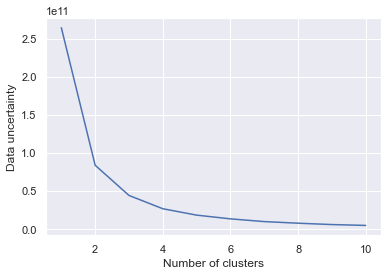

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

### DATA PREPROCESSING AND MACHINE LEARNING

 The optimal number of clusters is 4.


We will clean the data from outliers with the condition of removing no more than 2% of the data volume.

In [57]:
from sklearn.neighbors import LocalOutlierFactor

In [58]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(data) 

In [59]:
data['Out']=y_pred

In [60]:
Out=data[data['Out']!=1]

In [61]:
Out.shape

(20, 4)

In [62]:
data2=data[data['Out']==1]

In [63]:
data2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1961,530,66490,1
1,1752,210,39820,1
2,1609,720,54010,1
3,1748,620,53730,1
4,2111,450,46620,1
...,...,...,...,...
891,1910,1080,66390,1
892,1663,850,82080,1
893,1436,1060,76440,1
894,1560,770,96610,1


In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [66]:
y=data2['Store_Sales']
X=data2.drop(['Store_Sales','Out'],axis=1)

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 317534095.1629908
MAE: 14942.18380681818
------------------------------ 

model: LinearRegression()
RMSE: 254003891.854681
MAE: 13228.167904160182
------------------------------ 

model: ElasticNet()
RMSE: 254003889.17001352
MAE: 13228.168461403227
------------------------------ 

model: KNeighborsRegressor()
RMSE: 296613850.29545456
MAE: 14463.920454545454
------------------------------ 



 25% of the average. I think that this is a good result considering that we have only 2 features with no correlation with the target variable.

### RECOMENDATIONS

 Sales are one of the first indicators of store performance. If you want to increase sales in the store, then your actions will be aimed at attracting customers to the store or how to increase the average check.What method to choose to get the fastest result? To understand how you can increase sales in the store, you need to determine what format it belongs to. What buyer is it intended for? *Some stores are aimed at thrifty buyers who want to get the lowest cost. In others, customers value service more.

 If you have a discounter, then the service is not significant for him. People will put up with palletizing, with goods in boxes. But they will strive to get favorable prices. The increase in sales for the budget conscious is, first of all, an increase in the average bill.

 If you have a supermarket or convenience store, then prices will not play such an important role. The buyer comes to it, wanting to receive a certain level of service. Such a buyer does not want to stand in lines and waste his precious time. An increase in sales in it is an increase in the frequency of purchases.

 If you urgently need to increase sales in the store, then the easiest method is to increase the average check of the store. Goods are placed in additional display areas, impulse goods are placed everywhere. The availability of the product is ensured, and people start buying more and more. The buyer came for milk, but at the entrance he saw a mountain of fruit, along the way he noticed his favorite sausage, and at the exit the child took a toy. And now, along with milk, the buyer already has a full basket of products.

 Product Availability.This is the first thing you should pay attention to if there is a negative trend and you need to increase sales in the store. If the product is not on the shelf, then no one will buy it. The buyer should know that here he will always find the cottage cheese he needs or his favorite sausage.

 Stimulation of impulse purchases.Effectively and quickly increase the average bill allows the stimulation of impulse purchases. This is the purchase of goods that the buyer did not originally plan to take. How often have you walked into a store with the idea of buying a list of items, only to find a lot of unplanned items in your cart at the checkout? These are all impulse purchases that allow you to increase sales in the store

 Quality and product presentation. You come to the store and feel that you are comfortable. As a result, you spend more time in the store and buy more products.

 Increase in purchase volume. The goods are purchased in a volume larger than originally planned. Often the buyer is willing to buy more if the offer is good. To do this, promotions are used, for example N + 1 (“Two for the price of one”). When two or more items are sold at a better price than one. Or Cross-promo actions, when related products stimulate the sale of each other (“buy a brazier and get firewood as a gift”).

 Growth of the average ticket price.Increasing the average price in a check is more difficult than increasing the number of products and their volumes. In this case, the buyer must give preference to a more expensive product than he usually buys. This is possible if the buyer feels that the value of the product is higher than its price. Sincere customer service. Explanation of the values of the goods, stimulation to purchase new products.

 Increase in the number of buyers. Attracting new customers allows you to increase sales in the store, although it requires significant effort and investment. As you know, attracting a new customer is more difficult than retaining an old one. It is necessary to raise awareness of potential buyers and encourage them to make the first purchase.